In [108]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [54]:
dataset = pd.read_csv('/content/Earthquake.csv')

In [55]:
dataset.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [56]:
dataset.shape

(23412, 21)

In [57]:
dataset['Status'].value_counts()

Reviewed     20773
Automatic     2639
Name: Status, dtype: int64

In [58]:
dataset['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [59]:
dataset = dataset.fillna(0)

In [60]:
dataset.isnull().sum()

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Error                   0
Depth Seismic Stations        0
Magnitude                     0
Magnitude Type                0
Magnitude Error               0
Magnitude Seismic Stations    0
Azimuthal Gap                 0
Horizontal Distance           0
Horizontal Error              0
Root Mean Square              0
ID                            0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
dtype: int64

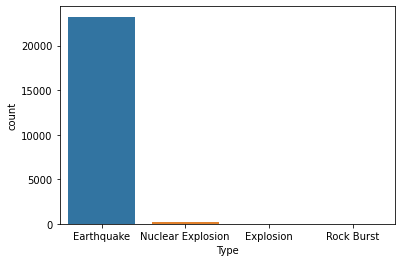

In [61]:
sns.countplot(x = 'Type',data = dataset)
plt.show()

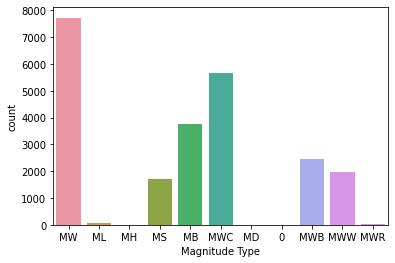

In [62]:
sns.countplot(x = 'Magnitude Type',data = dataset)
plt.show()

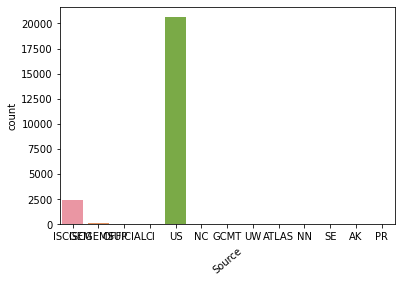

In [63]:
plot = sns.countplot(x = 'Source',data = dataset)
plot.set_xlabel(plot.get_xlabel(),rotation = 40)
plt.show()

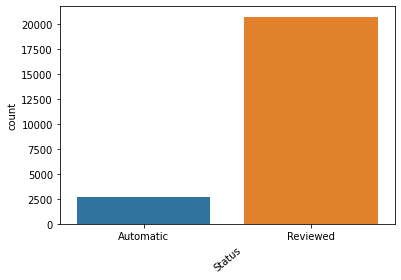

In [64]:
plot = sns.countplot(x = 'Status',data = dataset)
plot.set_xlabel(plot.get_xlabel(),rotation = 40)
plt.show()

In [65]:
dataset.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,0.0,0.0,6.0,MW,0.0,0.0,0.0,0.0,0.0,0.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,0.0,0.0,5.8,MW,0.0,0.0,0.0,0.0,0.0,0.0,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,0.0,0.0,6.2,MW,0.0,0.0,0.0,0.0,0.0,0.0,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,0.0,0.0,5.8,MW,0.0,0.0,0.0,0.0,0.0,0.0,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,0.0,0.0,5.8,MW,0.0,0.0,0.0,0.0,0.0,0.0,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [71]:
new_dataset = dataset.loc[:,['Latitude','Longitude','Type','Depth','Magnitude','Magnitude Type','Status']]

In [72]:
new_dataset.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Status
0,19.246,145.616,Earthquake,131.6,6.0,MW,Automatic
1,1.863,127.352,Earthquake,80.0,5.8,MW,Automatic
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,Automatic
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,Automatic
4,11.938,126.427,Earthquake,15.0,5.8,MW,Automatic


In [73]:
new_dataset.isnull().sum()

Latitude          0
Longitude         0
Type              0
Depth             0
Magnitude         0
Magnitude Type    0
Status            0
dtype: int64

In [76]:
new_dataset['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

Earthquake =1
Nuclear Explosion = 2
Explosion = 3
Rock Burst = 4

In [79]:
new_dataset.replace({'Type':{'Earthquake':1,'Nuclear Explosion':2,'Explosion':3,'Rock Burst':4}},inplace =True)

In [81]:
new_dataset['Magnitude Type'].value_counts()

MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
0         3
Name: Magnitude Type, dtype: int64

MW     1
MWC    2
MB     3
MWB    4
MWW    5
MS     6
ML     7
MWR    8
MD     9
MH     10
0 

In [82]:
new_dataset['Status'].value_counts()

Reviewed     20773
Automatic     2639
Name: Status, dtype: int64

In [83]:
new_dataset.replace({'Status':{'Automatic':0,'Reviewed':1}},inplace = True)

In [84]:
correlation = new_dataset.corr()

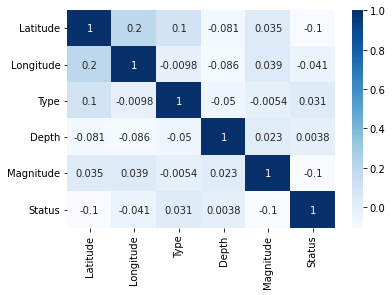

In [85]:
sns.heatmap(correlation,cmap='Blues',annot = True)
plt.show()

In [93]:
X = new_dataset.drop(columns=['Type','Magnitude Type'])

In [94]:
Y = new_dataset['Type']

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=1)

In [96]:
print(X.shape,X_test.shape,X_train.shape)

(23412, 5) (4683, 5) (18729, 5)


In [100]:
encoder = StandardScaler()

In [103]:
train_transform = encoder.fit_transform(X_train)

In [109]:
model = RandomForestClassifier()

In [111]:
model.fit(train_transform,Y_train)

RandomForestClassifier()

In [112]:
train_predict = model.predict(train_transform)

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(train_predict,Y_train)

1.0

In [125]:
a = new_dataset.to_csv('Y')

In [126]:
a

In [118]:
print(X)

       Latitude  Longitude   Depth  Magnitude  Status
0       19.2460   145.6160  131.60        6.0       0
1        1.8630   127.3520   80.00        5.8       0
2      -20.5790  -173.9720   20.00        6.2       0
3      -59.0760   -23.5570   15.00        5.8       0
4       11.9380   126.4270   15.00        5.8       0
...         ...        ...     ...        ...     ...
23407   38.3917  -118.8941   12.30        5.6       1
23408   38.3777  -118.8957    8.80        5.5       1
23409   36.9179   140.4262   10.00        5.9       1
23410   -9.0283   118.6639   79.00        6.3       1
23411   37.3973   141.4103   11.94        5.5       1

[23412 rows x 5 columns]


In [124]:
print(new_dataset)

       Latitude  Longitude  Type   Depth  Magnitude Magnitude Type  Status
0       19.2460   145.6160     1  131.60        6.0             MW       0
1        1.8630   127.3520     1   80.00        5.8             MW       0
2      -20.5790  -173.9720     1   20.00        6.2             MW       0
3      -59.0760   -23.5570     1   15.00        5.8             MW       0
4       11.9380   126.4270     1   15.00        5.8             MW       0
...         ...        ...   ...     ...        ...            ...     ...
23407   38.3917  -118.8941     1   12.30        5.6             ML       1
23408   38.3777  -118.8957     1    8.80        5.5             ML       1
23409   36.9179   140.4262     1   10.00        5.9            MWW       1
23410   -9.0283   118.6639     1   79.00        6.3            MWW       1
23411   37.3973   141.4103     1   11.94        5.5             MB       1

[23412 rows x 7 columns]


In [121]:
input_data = [ -9.0283,   118.6639,   79.00,       6.3 ,      1]
in_array = np.array(input_data)
reshape_data = in_array.reshape(1,-1)
encoder_data = encoder.transform(reshape_data)
prediction = model.predict(encoder_data)
if prediction[0]==1:
  print('Earthquake')
elif prediction[0]==2:
  print('Nuclear Exploision')
elif prediciton[0]==3:
  print('Nuclear')
else:
  print('Rock Burst')

Earthquake


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
